A customer is asking for advice on how to understand their current/existing and past/terminated membership base, in order to recruit ideal new members for a new membership drive: 
What types of members are ideal prospects (i.e., who to reach out to become a new members)?
What do members who terminate have in common?
What other metrics should be considered? 
NOTE: If you were tasked with answering the same questions for a digital add campaign, what would you include / recommend be considered? 
 
DELIVERABLES:
Create an excel file w/fake data with the following columns (each row would be a fictitious member record): 
City
State
Zip code
DoB 
Demographics
OTHER 
Outline questions that should be considered for analysis
Show actual data work using “fake” file above 
Denote what is vs. is not possible with the data set 
Document what other information and analysis is needed and how that would be done in a real scenario.
Provide final data analysis 
Recommend next steps 

# Create Fake Data to Use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(47)
%matplotlib inline

In [2]:
m_name = ['Albert', 'Bobby', 'Chris', 'Donald', 'Earl', 'Fredrick', 'George', 'Henry', 'Ian', 'Joseph', 'Kenny', 'Leonard', 
        'Martin', 'Ned', 'Oscar', 'Percival', 'Quinton', 'Rick', 'Sam', 'Thomas', 'Ulrich', 'Victor', 'Will', 'Xander', 
        'Yosef', 'Zach', 'Alex', 'Bob', 'Charlie', 'Dillon', 'Evan', 'Fred', 'Hank', 'Ivan', 'James', 'Kyle', 'Stan', 'Jack'
         , 'Robert', 'William']
f_name = ['Abigail', 'Alexa', 'Beatrice', 'Beth', 'Christina', 'Daisy', 'Elizabeth', 'Francesca', 'Grace', 'Haley', 'Hannah'
          ,'Isabella', 'Jenna', 'Kathy', 'Lindsey', 'Mary', 'Natalie', 'Olivia', 'Patricia', 'Queenie', 'Rachel', 'Samantha'
          , 'Sophia', 'Trish', 'Uberrta', 'Victoria', 'Wendy', 'Wanda', 'Xena', 'Yolanda', 'Zada', 'Ana', 'Jody', 'Kate', 
         'Cassie', 'Rose', 'Gabriella', 'Melissa', 'Dorthy', 'Scarlet']

In [3]:
print(len(m_name))
print(len(f_name))

40
40


In [4]:
m_name = np.array(m_name)
f_name = np.array(f_name)

In [5]:
'''As with real life, separating categories to more realistically distribute. These categories can be change to match any 
desired outcome. In this case, I am showing a distribution with more white, hispanice, and black members. There's no reason 
to this choice.'''

ethnicity1 = ['White', 'Hispanic', 'Black'] 
ethnicity2 = ['Asian', 'Native American', 'Other']

In [6]:
age1 = np.random.randint(18, 55, 500)

In [7]:
age2 = np.random.randint(18, 35, 500)

In [8]:
age = np.append(age1, age2)

In [9]:
male = np.random.choice(m_name, 400)

In [10]:
female = np.random.choice(f_name, 600)

In [11]:
fname = np.append(male, female)

In [12]:
ethnic1 = np.random.choice(ethnicity1, 650)
ethnic2 = np.random.choice(ethnicity2, 350)

In [13]:
ethnicity = np.append(ethnic1, ethnic2)

In [14]:
np.random.shuffle(ethnicity)

In [15]:
mem_level1 = ['Basic', 'Silver', 'Gold']
mem_level2 = ['Platinum', 'Diamond']

In [16]:
mem1 = np.random.choice(mem_level1, 800)

In [17]:
mem2 = np.random.choice(mem_level2, 200)

In [18]:
membership = np.append(mem1, mem2)

In [19]:
np.random.shuffle(membership)

In [20]:
gender_male = np.random.choice(['male'], 400)

In [21]:
gender_female = np.random.choice(['female'], 600)

In [22]:
gender = np.append(gender_male, gender_female)

In [23]:
city = ['Waco', 'Fort Worth', 'Dallas', 'Irving', 'DeSoto', 'Plano', 'Denton', 'Frisco']
# 76701-76711, 76101-76110, 76201-76215, 75038, 75115, 75023-75025, 76203-76205, 75035

In [24]:
city = np.random.choice(city, 1000)

In [25]:
dict = {'fname':fname, 'age':age, 'gender':gender, 'ethnicity':ethnicity, 'member_level':membership, 'city':city}

In [26]:
df = pd.DataFrame(dict)

In [27]:
df['state'] = 'Texas'

In [28]:
def zip_code(data):
    if data == 'Waco':
        return np.random.randint(76705, 76711)
    if data == 'Fort Worth':
        return np.random.randint(76101, 76110)
    if data == 'Dallas':
        return np.random.randint(76201, 76215)
    if data == 'Irving':
        return 75038
    if data == 'DeSoto':
        return 75115
    if data == 'Plano':
        return np.random.randint(75023, 75025)
    if data == 'Denton':
        return np.random.randint(76203, 76205)
    if data == 'Frisco':
        return 75035 

In [29]:
df['zip'] = df['city'].apply(zip_code)

In [30]:
def fill_churn(data):
    if data == 'Diamond':
        return 0
    if data == 'Platinum':
        return 0
    if data == 'Gold':
        return 0
    else:
        return np.random.randint(0, 2)

In [31]:
df['churned'] = df['member_level'].apply(fill_churn)

In [32]:
df

,fname,age,gender,ethnicity,member_level,city,state,zip,churned
0,Bob,25,male,Asian,Diamond,DeSoto,Texas,75115,0
1,Jack,24,male,Other,Platinum,Frisco,Texas,75035,0
2,Fred,25,male,Asian,Basic,Dallas,Texas,76206,1
3,Zach,26,male,Asian,Silver,Waco,Texas,76709,1
4,Martin,26,male,Black,Platinum,Fort Worth,Texas,76104,0
...,...,...,...,...,...,...,...,...,...
995,Wendy,32,female,Hispanic,Silver,Plano,Texas,75023,1
996,Melissa,29,female,Black,Basic,Irving,Texas,75038,0
997,Melissa,28,female,White,Basic,Waco,Texas,76705,0
998,Beatrice,25,female,Hispanic,Silver,Frisco,Texas,75035,1


## Exploratory Data Analysis (EDA)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fname         1000 non-null   object
 1   age           1000 non-null   int32 
 2   gender        1000 non-null   object
 3   ethnicity     1000 non-null   object
 4   member_level  1000 non-null   object
 5   city          1000 non-null   object
 6   state         1000 non-null   object
 7   zip           1000 non-null   int64 
 8   churned       1000 non-null   int64 
dtypes: int32(1), int64(2), object(6)
memory usage: 66.5+ KB


In [34]:
df['zip'] = df['zip'].astype(str)
df['churned'] = df['churned'].astype(bool)

In [35]:
df.describe()

,age
count,1000.000000
mean,31.274000
std,9.610582
min,18.000000
25%,24.000000
50%,29.000000
75%,37.000000
max,54.000000


In [36]:
age_gender = pd.pivot_table(df, values='age', columns='gender', aggfunc=['mean', 'min', 'max'])

In [37]:
age_gender

mean             min         max     
gender  female     male female male female male
age     27.875  36.3725     18   18     54   54

Here we see that our average female gym-goer is approximately 9 years younger than the average male. This insight can help inform advertising to ensure ad targetting is tailored to the right average age. 

In [38]:
df['city'].value_counts()

Plano         134
Denton        133
Frisco        133
DeSoto        129
Waco          125
Dallas        124
Fort Worth    114
Irving        108
Name: city, dtype: int64

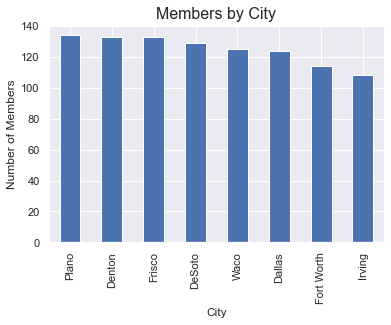

In [39]:
plt.xlabel('City')
plt.ylabel('Number of Members')
plt.title('Members by City', fontsize=16)
df['city'].value_counts().plot(kind='bar');

Here we see that our members comes from eight different cities in the Dallas/Fort Worth area. And, while the relative numbers are similar across the 8 cities, we see Irving with a notably lower number. <br><br>
Is this due to a lack of targeting in Irving? Or, perhaps due to a competing gym that is more convenient to Irving? 

In [40]:
df.gender.value_counts()

female    600
male      400
Name: gender, dtype: int64

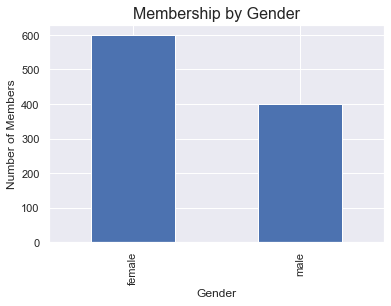

In [41]:
plt.title('Membership by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Number of Members')
df.gender.value_counts().plot(kind='bar');

Here we see that females account for 60% of the members we have in our records. Combined with our knowledge of younger women using the gym, ths suggests we might want to target younger women more frequently in our marketing.

In [42]:
df.member_level.value_counts()

Silver      298
Gold        267
Basic       235
Diamond     101
Platinum     99
Name: member_level, dtype: int64

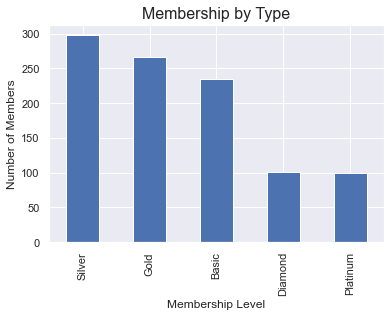

In [43]:
plt.title('Membership by Type', fontsize=16)
plt.xlabel('Membership Level')
plt.ylabel('Number of Members')
df.member_level.value_counts().plot(kind='bar');

Here we see Silver is our most attractive membership level. It might be worth doing further digging into why this might be the case. We also see Gold surpasses the Basic plan. This could suggest that we are doing well in promoting higher level plans, as fewer members are opting for the most basic level of membership. <br><br>
If we can figure out what sets Silver apart, we might be able to make a stronger push for Gold and bring that to the top.<br><br>
Finally, both Diamond and Platinum plans have similar levels of membership. With Diamond being our premeir plan, this is encouraging to see. One other consideration would be to see if we can device a way to elevate more Gold members to our Platinum or Diamond plan. 

## Exploring Churned vs. Retained

In [44]:
churned = df[df['churned'] == 1]
active = df[df['churned'] == 0]

In [45]:
active.describe()

,age
count,734.000000
mean,31.455041
std,9.589104
min,18.000000
25%,24.000000
50%,30.000000
75%,37.000000
max,54.000000


In [46]:
churned.describe()

,age
count,266.000000
mean,30.774436
std,9.670119
min,18.000000
25%,24.000000
50%,29.000000
75%,34.000000
max,54.000000


In [47]:
age_gender_a = pd.pivot_table(active, values='age', columns='gender', aggfunc=['mean', 'min', 'max'])

In [48]:
age_gender_a

mean               min         max     
gender     female       male female male female male
age     27.993228  36.725086     18   18     54   54

In [49]:
age_gender_c = pd.pivot_table(churned, values='age', columns='gender', aggfunc=['mean', 'min', 'max'])

In [50]:
age_gender_c

mean               min         max     
gender     female       male female male female male
age     27.541401  35.431193     18   18     54   54

Comparing our active members vs. those who have churned, we see the average female age is relatively the same, but our average male who has churned is a solid younger. This could suggest that younger men are more likely to churn, but will definitely require more digging before coming to that conclusion. 

In [51]:
active['city'].value_counts()

Frisco        100
Denton         99
Plano          98
Waco           97
Fort Worth     88
DeSoto         85
Dallas         85
Irving         82
Name: city, dtype: int64

In [52]:
churned['city'].value_counts()

DeSoto        44
Dallas        39
Plano         36
Denton        34
Frisco        33
Waco          28
Irving        26
Fort Worth    26
Name: city, dtype: int64

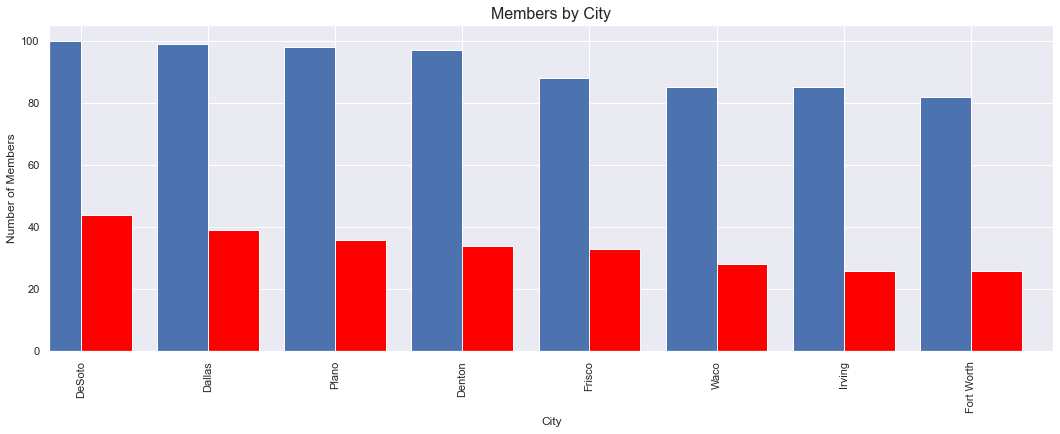

In [53]:
plt.figure(figsize=(18, 6))
plt.xlabel('City')
plt.ylabel('Number of Members')
plt.title('Members by City', fontsize=16)
active['city'].value_counts().plot(kind='bar', width=-0.4, align='edge')
churned['city'].value_counts().plot(kind='bar', color='red', width=0.4, align='edge');

Seeing these side-by-side, we see while most our active members live in DeSoto, this city is also responsible for the largest number of churned customers. Similarly, Dallas, Plano, and Denton follow behind. <br><br>
On the surface, there is little we can gather about whether someone will churn based on their city. However, I would note it's important not to dismiss this. As we dig further into the data, we might find some other relationships here worth noting. 

In [54]:
active.gender.value_counts()

female    443
male      291
Name: gender, dtype: int64

In [55]:
churned.gender.value_counts()

female    157
male      109
Name: gender, dtype: int64

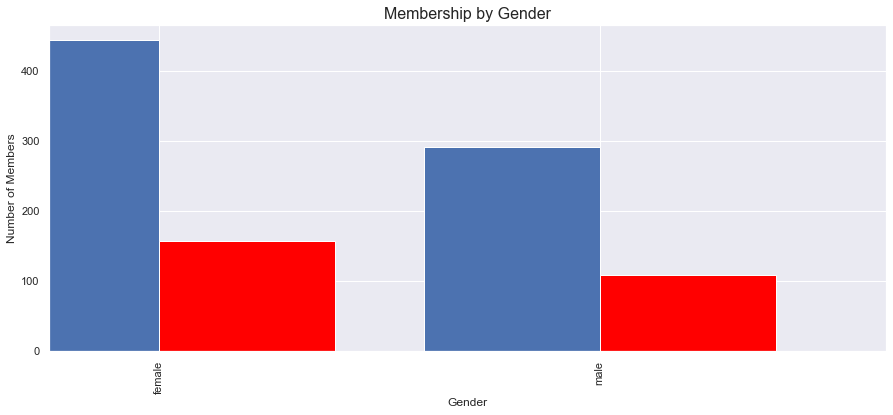

In [56]:
plt.figure(figsize=(15, 6))
plt.title('Membership by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Number of Members')
active.gender.value_counts().plot(kind='bar', width=-0.4, align='edge')
churned.gender.value_counts().plot(kind='bar', width=0.4, align='edge', color='red');

In [57]:
print('Churn Ratio for Women:', 157/443)
print('Churn Ratio for Men:', 109/291)

Churn Ratio for Women: 0.3544018058690745
Churn Ratio for Men: 0.3745704467353952


On the surface, this make sit appear that we might need to recosider targeting based on gender. After all, there are clearly more females churning than males. However, when we look at ratios, we see a different picture. <br><br>
In fact, based on their lower overall numbers, it appears men are churning at a slightly higher ratio than women. 

In [58]:
active.member_level.value_counts()

Gold        267
Silver      153
Basic       114
Diamond     101
Platinum     99
Name: member_level, dtype: int64

In [59]:
churned.member_level.value_counts()

Silver    145
Basic     121
Name: member_level, dtype: int64

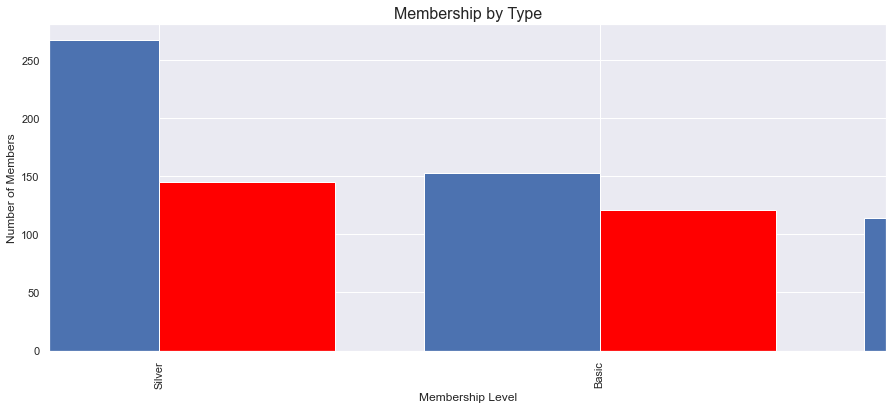

In [60]:
plt.figure(figsize=(15, 6))
plt.title('Membership by Type', fontsize=16)
plt.xlabel('Membership Level')
plt.ylabel('Number of Members')
active.member_level.value_counts().plot(kind='bar', width=-0.4, align='edge')
churned.member_level.value_counts().plot(kind='bar', width=0.4, align='edge', color='red');

Since there are only two plans where we see churn among our users, this provides an important distinction for us. While initial data suggested our Silver plan might be something to look at more closely, we see here that it's also responsible for most of our churn. With that in mind, we should explore this plan more closely. 

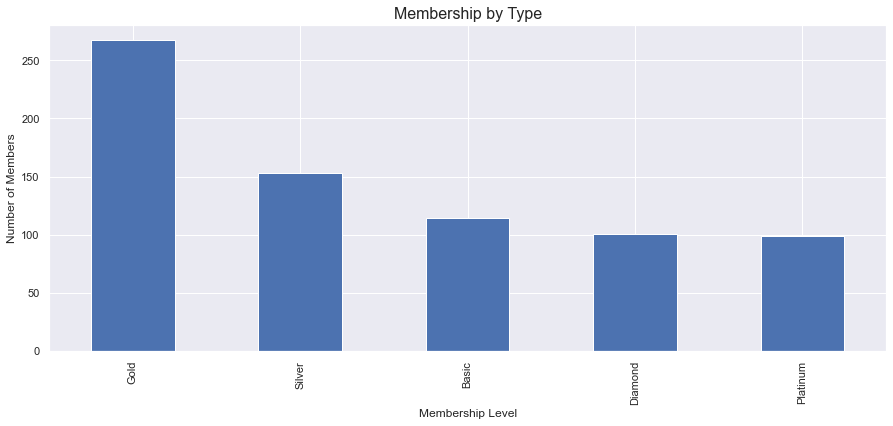

In [61]:
plt.figure(figsize=(15, 6))
plt.title('Membership by Type', fontsize=16)
plt.xlabel('Membership Level')
plt.ylabel('Number of Members')
active.member_level.value_counts().plot(kind='bar')

Looking only at current members, it seems our Gold plan has become the most popular over time and retains users just as frequently as Diamond and Platinum.<br><br>
With that in mind, we should look at elevating members from Basic and Silver plans to our Gold plan. Additionally, our Diamond and Platinum members remain loyal as well, so we should look for opportunities to ascend members up from Gold.

# Exporting Data for Client Report

In [62]:
df.to_csv('membership_data.csv')